In [ ]:
from google.colab import files

uploaded = files.upload()


Saving E-Commerce Data.csv to E-Commerce Data (1).csv


In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
df = pd.read_csv('/content/drive/MyDrive/445 datasets/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()  # Drop missing values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features (you may need to select appropriate features and preprocess them)
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

# Define a binary target variable (Example: Large transaction if Quantity > 50)
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time
import psutil
from sklearn.ensemble import AdaBoostClassifier
import tracemalloc

# Load the data (assuming it's already uploaded)
df = pd.read_csv('/content/drive/MyDrive/445 datasets/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()  # Drop missing values

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Define a binary target variable
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode all potential categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        # Fit on the combined data to ensure all categories are captured
        le.fit(pd.concat([X_train[col], X_test[col]]))
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Record the start time and CPU usage
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

# Start tracking memory allocations RIGHT BEFORE TRAINING
tracemalloc.start()

# Initialize and train the AdaBoost model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Stop tracking memory allocations IMMEDIATELY AFTER TRAINING
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Record the end time and CPU usage
cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# Calculate the training time and resource usage
training_time = end_time - start_time
cpu_usage = cpu_end - cpu_start
ram_usage = peak / (1024**2)  # Peak memory in MB

print(f"Training time: {training_time} seconds")
print(f"CPU usage: {cpu_usage}%")
print(f"Peak RAM usage: {ram_usage} MB")

Training time: 14.54796051979065 seconds
CPU usage: 51.6%
Peak RAM usage: 46.61301326751709 MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Load and preprocess the data (replace with your own code) ---
# Example (assuming you have 'E-Commerce Data.csv' uploaded):
df = pd.read_csv('/content/drive/MyDrive/445 datasets/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(pd.concat([X_train[col], X_test[col]]))
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
# --- End of data loading and preprocessing ---

# Define the base estimator with hyperparameters
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize AdaBoost
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [3, 5, 7],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


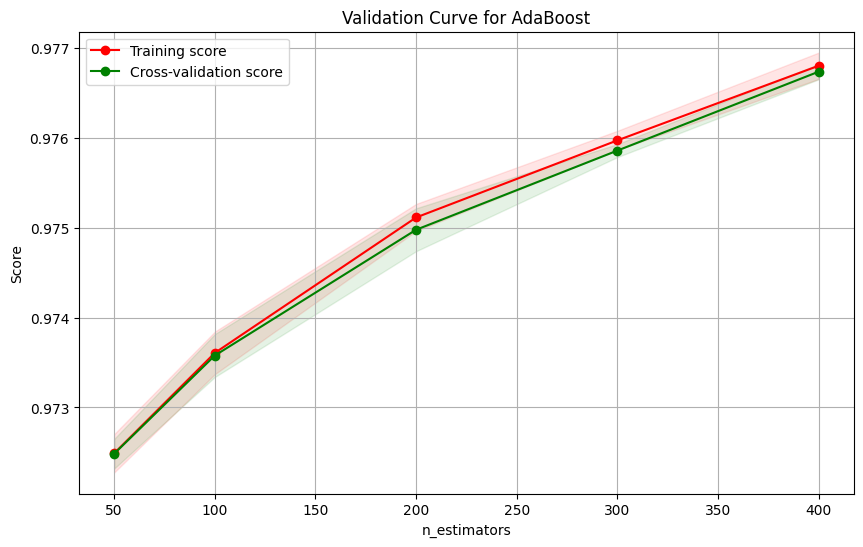

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize the AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=42)

# Example: Effect of `n_estimators` regularization parameter
param_range = [50, 100, 200, 300, 400]
train_scores, test_scores = validation_curve(ada_boost, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=3, n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Validation Curve for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('Validation_Curve_n_estimators_AdaBoost.png')
plt.show()


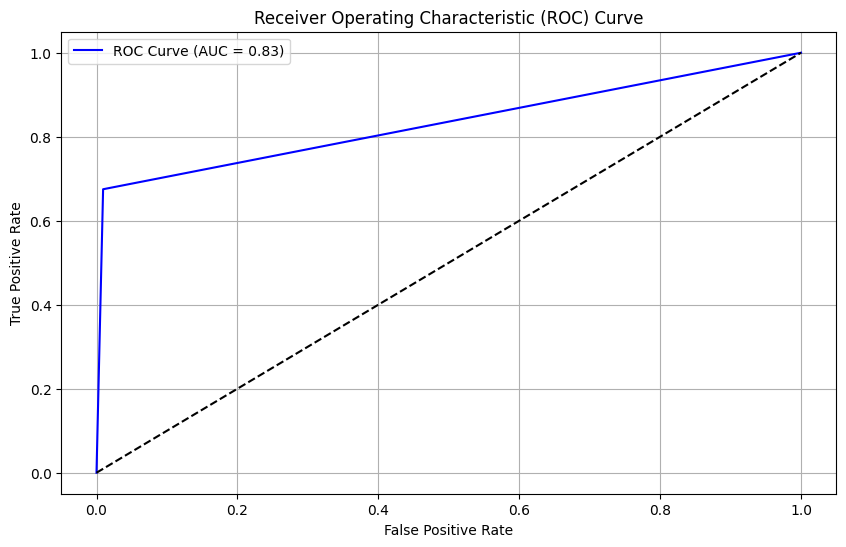

Accuracy: 0.98
Precision: 0.69
Recall: 0.67
F1 Score: 0.68
AUC: 0.83


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Fit the Decision Tree model to the training data
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.savefig('ROC_Curve_Decision_Tree.png')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")